In [73]:
import random
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 1. Cellular Automata

A Cellular Automaton (CA) is a grid-based computational model where:

- Cells → Positioned in a grid (e.g., 1D, 2D).
- States → Each cell has a state (e.g., 0 or 1).
- Rules → Cells update their state based on their neighbors’ states.

<figure style="text-align: center;">
<img src="imgs/pollution_over_the_sea.gif" width=400>
    <figcaption>
    A cellular automata simulation illustrating the diffusion of pollutants across a large body of water interspersed with numerous islands
    </figcaption>
</figure>
    
How It Works:

- Grid Initialization → Define initial cell states.
- Neighborhood → Determine which cells affect the current cell (e.g., Moore or von Neumann neighborhood).
- State Update → Apply a rule that modifies the cell’s state.
- Iteration → Repeat the process for multiple steps to observe patterns.

# 2. Application: Schelling's Segregation Model

Schelling's Segregation Model is a simple agent-based model demonstrating how small individual preferences can lead to large-scale segregation patterns.  
In the model:
- A grid represents a neighborhood.
- Agents belong to two groups (e.g., red and blue).
- Each agent prefers that a certain percentage of its neighbors are of the same group (the **tolerance level**).
- If the tolerance is not met, the agent moves to an empty location.

Over time, even with mild preferences, the system often evolves into highly segregated neighborhoods — illustrating how local behaviors can lead to unintended global patterns.

## 2.1. Initialization
You need to create a world (a SIZExSIZE square grid) with specific number of 0s, 1s, and 2s according to given parameters.

- 1 → Group 1 agents
- 2 → Group 2 agents
- 0 → Empty spaces

Grid is randomly shuffled to initialize the world.

In [74]:
# Parameters
size = 100  # Grid size (10x10)
empty_ratio = 0.2  # Percentage of empty spaces
group_ratio = 0.8  # Percentage of cells occupied by residents
threshold = 0.5  # Similarity threshold for satisfaction
iterations = 30  # Number of iterations

In [75]:
def create_grid(size, empty_ratio, group_ratio):
    """Create the initial grid with two groups and empty spaces."""
    grid = []
    total_cells = size * size
    group1_count = int(total_cells * group_ratio / 2)
    group2_count = int(total_cells * group_ratio / 2)
    empty_count = total_cells - group1_count - group2_count

    cells = [1] * group1_count + [2] * group2_count + [0] * empty_count
    random.shuffle(cells)

    for i in range(size):
        grid.append(cells[i * size:(i + 1) * size])
    return grid

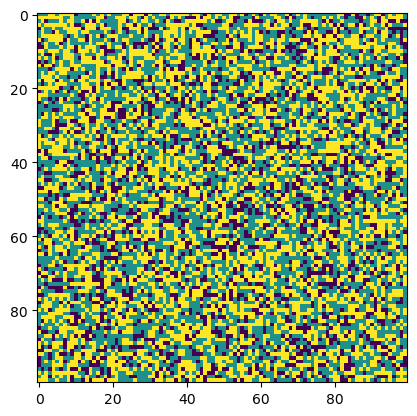

In [76]:
# visualize the initial world
grid = create_grid(size, empty_ratio, group_ratio)
plt.imshow(grid)

## 2.2. Preparing data series
- Agents check their neighbors to determine if they are satisfied.
- If unhappy, they move to an empty space.
- Grid updates after each step.

In [77]:
def find_empty_cell(grid):
    """Find a random empty cell."""
    empty_cells = [(x, y) for x in range(len(grid)) for y in range(len(grid[x])) if grid[x][y] == 0]
    return empty_cells

In [78]:
def is_unsatisfied(x, y, grid, threshold):
    """Check if a resident at (x, y) is unsatisfied."""
    size = len(grid)
    current = grid[x][y]
    if current == 0:
        return False

    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size:
                neighbors.append(grid[nx][ny])

    same_group_count = neighbors.count(current)
    total_neighbors = len([n for n in neighbors if n])
    return total_neighbors > 0 and (same_group_count / total_neighbors) < threshold

In [79]:
def move_unsatisfied(grid, threshold):
    """Move unsatisfied residents to empty cells."""
    size = len(grid)
    unsatisfied = []
    for x in range(size):
        for y in range(size):
            if grid[x][y] and is_unsatisfied(x, y, grid, threshold):
                unsatisfied.append((x, y))

    empty_cells = find_empty_cell(grid)
    for x, y in unsatisfied:
        ex, ey = random.choice(empty_cells)
        empty_cells.remove((ex, ey))
        empty_cells.append((x, y))
        grid[ex][ey], grid[x][y] = grid[x][y], 0

## 2.3. Animate and experiment

Change parameters such as SIZE, EMPTY_RATIO, and SIMILARITY_THRESHOLD to observe different behaviors.

In [80]:
def schelling_simulation(size, empty_ratio, group_ratio, threshold, iterations):
    """Run Schelling's segregation simulation."""
    grid = create_grid(size, empty_ratio, group_ratio)
    history = [copy.deepcopy(grid)]

    print("Running...")
    for i in range(iterations):
        move_unsatisfied(grid, threshold)
        history.append(copy.deepcopy(grid))
    print("Done.")
    return history

Running...
Done.


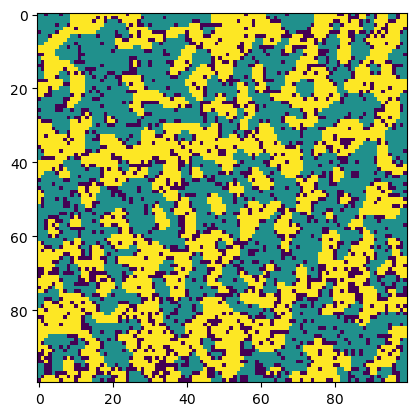

In [81]:
# simulation
history = schelling_simulation(size, empty_ratio, group_ratio, threshold, iterations)
plt.imshow(history[-1])

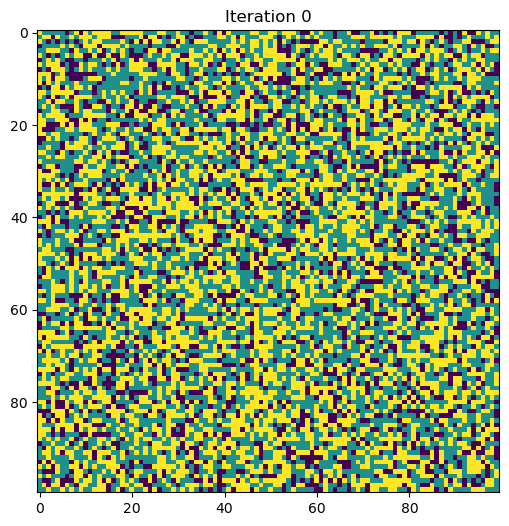

In [82]:
# animation
def frame(i):
    ax.clear()
    ax.set_title(f"Iteration {i}")
    ax.imshow(history[i])

fig, ax = plt.subplots(figsize=(8,6))

animation = FuncAnimation(fig, frame, interval=100, frames=len(history), repeat=False)
HTML(animation.to_jshtml())

# 3. Applying the Model to NYC

NYC is one of the most ethnically diverse cities in the world, but neighborhoods often have distinct ethnic concentrations, such as:

- Flushing, Queens – high concentration of Chinese and Korean communities

- Jackson Heights, Queens – large Latin American and South Asian populations

- Harlem – historically African American, now increasingly gentrified

- Brighton Beach, Brooklyn – strong Russian-speaking community

Using Schelling’s model:

- Imagine each resident choosing housing based on tolerance thresholds (e.g., preferring at least 30% of neighbors of their own ethnicity).

- Over time, these micro-decisions lead to neighborhoods where ethnic groups cluster, even if residents are open to some diversity.

In [84]:
%%html
<iframe src="https://bestneighborhood.org/race-in-new-york-ny/" width="1000" height="600"></iframe>